In [13]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [15]:
Regression1 = pd.read_csv("Regression1.csv")

In [16]:
Regression1.describe()

,GR8618,GR9618,GDP86,GDP96,GDP86SQ,SEC86,PRIM86,SEC76,PRIM76,gc_over_y,POL,PPP90
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,1.799999,2.023753,4.015396,7.747143,1.624139,54.873894,95.087875,43.826357,89.285984,15.785687,-0.038861,43.781675
std,1.618593,1.606669,5.478406,11.022585,1.178539,31.010413,23.282991,30.180370,27.185336,5.717695,0.911731,106.298586
min,-1.845627,-1.699845,0.125152,0.134982,0.353768,3.827490,23.366460,1.175890,14.614510,3.949210,-2.275000,0.000010
25%,0.761570,1.126168,0.478599,0.721825,0.691793,27.319723,83.297830,15.657285,75.780083,11.582150,-0.732250,0.624160
50%,1.658251,1.743682,1.444002,2.193797,1.201633,57.200015,100.603385,39.632985,98.428460,14.922130,-0.043500,1.559045
75%,2.868131,2.969251,5.023126,11.774994,2.240816,83.931020,106.521142,70.946362,106.564375,19.021432,0.814500,12.646590
max,8.452702,8.369899,23.751450,52.571935,4.873546,117.039370,146.045550,106.199910,144.729910,36.586800,1.429000,672.445990


In [17]:
target = Regression1[['GR8618']]
target2 = Regression1[['GR9618']]
GDP86 = Regression1[['GDP86']]
GDP96 = Regression1[['GDP96']]
GDP86SQ = Regression1[['GDP86SQ']]
SEC86= Regression1[['SEC86']]
PRIM86 = Regression1[['PRIM86']]
SEC76 = Regression1[['SEC76']]
PRIM76 = Regression1[['PRIM76']]
gc_over_y= Regression1[['gc_over_y']]
POL = Regression1[['POL']]
PPP90 = Regression1[['PPP90']]

In [47]:
reg0 = sm.add_constant(GDP86,has_constant="add")

In [48]:
reg0 = sm.OLS(target, reg0)
fitted_reg0 = reg0.fit()

In [49]:
fitted_reg0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GR8618   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.216
Date:                Fri, 05 Jun 2020   Prob (F-statistic):             0.0754
Time:                        21:59:33   Log-Likelihood:                -229.75
No. Observations:                 122   AIC:                             463.5
Df Residuals:                     120   BIC:                             469.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9917      0.180     11.046      0.000       1.635       2.349
GDP86         -0.0477      0.027     -1.793      0.075      -0.100       0.005
==============================================================================
Omnibus:                        8.419   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.281
Skew:                           0.408   Prob(JB):                      0.00586
Kurtosis:                       4.165   Cond. No.                         8.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_data_1 = pd.concat([GDP86, SEC86, PRIM86, gc_over_y, POL, PPP90], axis=1)

In [19]:
x_data_1 = sm.add_constant(x_data_1,has_constant="add")

In [20]:
reg1 = sm.OLS(target, x_data_1)
fitted_reg1 = reg1.fit()

In [41]:
fitted_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GR8618   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.406
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           0.000480
Time:                        21:54:12   Log-Likelihood:                -218.74
No. Observations:                 122   AIC:                             451.5
Df Residuals:                     115   BIC:                             471.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5997      0.794      3.273      0.001       1.027       4.173
GDP86         -0.1356      0.036     -3.737      0.000      -0.207      -0.064
SEC86          0.0188      0.007      2.780      0.006       0.005       0.032
PRIM86        -0.0028      0.007     -0.395      0.694      -0.017       0.011
gc_over_y     -0.0685      0.027     -2.541      0.012      -0.122      -0.015
POL            0.4967      0.202      2.456      0.016       0.096       0.897
PPP90          0.0017      0.001      1.268      0.207      -0.001       0.004
==============================================================================
Omnibus:                       25.964   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.030
Skew:                           0.836   Prob(JB):                     2.51e-13
Kurtosis:                       5.936   Cond. No.                         777.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import matplotlib.pyplot as plt

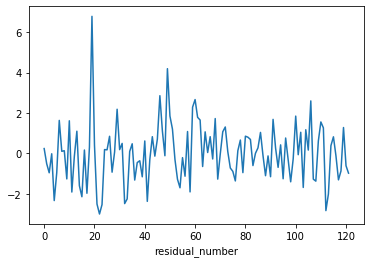

In [23]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
fitted_reg1.resid.plot()

plt.xlabel("residual_number")
plt.show()

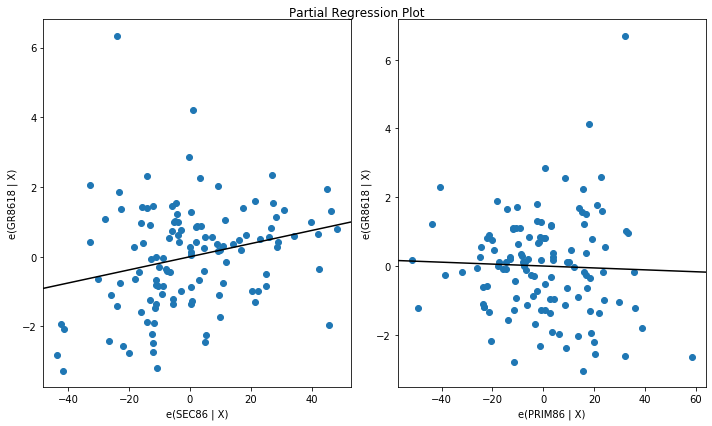

In [24]:
fig = plt.figure(figsize=(10, 6))

plot_partregress_grid(fitted_reg1, ['SEC86', 'PRIM86'], fig=fig)
plt.show()

In [25]:
x_data_2 = pd.concat([GDP86, SEC86, PRIM86, gc_over_y, POL, PPP90], axis=1)

In [26]:
x_data_2 = sm.add_constant(x_data_2,has_constant="add")

In [27]:
reg2 = sm.OLS(target, x_data_2)
fitted_reg2 = reg2.fit()

In [28]:
fitted_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GR8618   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.406
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           0.000480
Time:                        21:53:55   Log-Likelihood:                -218.74
No. Observations:                 122   AIC:                             451.5
Df Residuals:                     115   BIC:                             471.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5997      0.794      3.273      0.001       1.027       4.173
GDP86         -0.1356      0.036     -3.737      0.000      -0.207      -0.064
SEC86          0.0188      0.007      2.780      0.006       0.005       0.032
PRIM86        -0.0028      0.007     -0.395      0.694      -0.017       0.011
gc_over_y     -0.0685      0.027     -2.541      0.012      -0.122      -0.015
POL            0.4967      0.202      2.456      0.016       0.096       0.897
PPP90          0.0017      0.001      1.268      0.207      -0.001       0.004
==============================================================================
Omnibus:                       25.964   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.030
Skew:                           0.836   Prob(JB):                     2.51e-13
Kurtosis:                       5.936   Cond. No.                         777.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x_data_3 = pd.concat([GDP86, SEC86, PRIM86, gc_over_y, POL, PPP90], axis=1)

In [30]:
x_data_3 = sm.add_constant(x_data_3,has_constant="add")

In [31]:
reg3 = sm.OLS(target2, x_data_3)
fitted_reg3 = reg3.fit()

In [32]:
fitted_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GR9618   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     5.533
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           4.56e-05
Time:                        21:53:57   Log-Likelihood:                -214.98
No. Observations:                 122   AIC:                             444.0
Df Residuals:                     115   BIC:                             463.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3398      0.770      4.337      0.000       1.814       4.865
GDP86         -0.1589      0.035     -4.517      0.000      -0.229      -0.089
SEC86          0.0226      0.007      3.442      0.001       0.010       0.036
PRIM86        -0.0076      0.007     -1.106      0.271      -0.021       0.006
gc_over_y     -0.0774      0.026     -2.962      0.004      -0.129      -0.026
POL            0.2558      0.196      1.304      0.195      -0.133       0.644
PPP90          0.0007      0.001      0.530      0.597      -0.002       0.003
==============================================================================
Omnibus:                       27.092   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.170
Skew:                           0.951   Prob(JB):                     7.74e-12
Kurtosis:                       5.539   Cond. No.                         777.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
x_data_4 = pd.concat([GDP96, SEC86, PRIM86, gc_over_y, POL, PPP90], axis=1)

In [34]:
x_data_4 = sm.add_constant(x_data_4,has_constant="add")

In [35]:
reg4 = sm.OLS(target2, x_data_4)
fitted_reg4 = reg4.fit()

In [36]:
fitted_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GR9618   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.867
Date:                Fri, 05 Jun 2020   Prob (F-statistic):            0.00149
Time:                        21:53:58   Log-Likelihood:                -219.24
No. Observations:                 122   AIC:                             452.5
Df Residuals:                     115   BIC:                             472.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3095      0.806      4.108      0.000       1.714       4.905
GDP96         -0.0635      0.019     -3.358      0.001      -0.101      -0.026
SEC86          0.0195      0.007      2.832      0.005       0.006       0.033
PRIM86        -0.0062      0.007     -0.876      0.383      -0.020       0.008
gc_over_y     -0.0823      0.027     -3.031      0.003      -0.136      -0.029
POL            0.2403      0.211      1.139      0.257      -0.178       0.658
PPP90          0.0009      0.001      0.678      0.499      -0.002       0.004
==============================================================================
Omnibus:                       20.601   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.026
Skew:                           0.753   Prob(JB):                     1.50e-08
Kurtosis:                       5.195   Cond. No.                         786.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x_data_5 = pd.concat([GDP86, SEC86, PRIM86, SEC76, PRIM76, gc_over_y, POL, PPP90], axis=1)

In [38]:
x_data_5 = sm.add_constant(x_data_5,has_constant="add")

In [39]:
reg5 = sm.OLS(target, x_data_5)
fitted_reg5 = reg5.fit()

In [40]:
fitted_reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GR8618   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     3.532
Date:                Fri, 05 Jun 2020   Prob (F-statistic):            0.00110
Time:                        21:53:59   Log-Likelihood:                -217.74
No. Observations:                 122   AIC:                             453.5
Df Residuals:                     113   BIC:                             478.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4188      0.806      3.002      0.003       0.822       4.015
GDP86         -0.1366      0.036     -3.760      0.000      -0.209      -0.065
SEC86          0.0054      0.013      0.415      0.679      -0.020       0.031
PRIM86         0.0050      0.012      0.420      0.675      -0.019       0.029
SEC76          0.0170      0.013      1.329      0.186      -0.008       0.042
PRIM76        -0.0078      0.011     -0.693      0.490      -0.030       0.015
gc_over_y     -0.0610      0.028     -2.217      0.029      -0.116      -0.006
POL            0.4655      0.205      2.268      0.025       0.059       0.872
PPP90          0.0020      0.001      1.457      0.148      -0.001       0.005
==============================================================================
Omnibus:                       18.542   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.876
Skew:                           0.658   Prob(JB):                     4.40e-08
Kurtosis:                       5.221   Cond. No.                         974.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""